# Car Price Prediction Model

Creating a price prediction model for cars based on the Car Dataset from Kaggle involves several steps, including data preprocessing, feature engineering, model selection, training, evaluation, and optimization.
Dataset Source: [Kaggle.com](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv)

---

## Overview
The car dataset comprises information about various cars including their make, model, price, year, mileage, fuel type, transmission, location, color, owner type, seller type, engine specifications, dimensions, seating capacity, and fuel tank capacity.

### Features
- Make: Manufacturer or brand of the car.
- Model: Model name or number of the car.
- Price: Price of the car in the local currency.
- Year: Manufacturing year of the car.
- Kilometer: Mileage or distance traveled by the car in kilometers.
- Fuel Type: Type of fuel used by the car (e.g., Diesel, Petrol, CNG).
- Transmission: Type of transmission (e.g., Manual, Automatic).
- Location: Location where the car is available or registered.
- Color: Exterior color of the car.
- Owner: Ownership type (e.g., First owner, Second owner).
- Seller Type: Type of seller (e.g., Individual, Corporate).
- Engine: Engine displacement in cubic centimeters (cc).
- Max Power: Maximum power output of the engine in brake horsepower (bhp) at a specific RPM.
- Max Torque: Maximum torque produced by the engine in Newton-meters (Nm) at a specific RPM.
- Drivetrain: Type of drivetrain (e.g., FWD - Front-Wheel Drive, RWD - Rear-Wheel Drive).
- Length: Length of the car in millimeters.
- Width: Width of the car in millimeters.
- Height: Height of the car in millimeters.
- Seating Capacity: Number of seats in the car.
- Fuel Tank Capacity: Capacity of the fuel tank in liters.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
# Loading and Previewing the Car Dataset
df =pd.read_csv('car_details.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
df.shape

(2059, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

### Data Preprocessing and feature engineering steps

In [5]:
# Check for missing values in each column of the Data
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [6]:
# Only rows with NaN (missing) values in the 'Engine' column will be dropped
df.dropna(subset='Engine', inplace=True)

In [7]:
# The 'Model' column is considered irrelevant for analysis, so it is dropped
# Columns like 'Drivetrain' and 'Fuel Tank Capacity' are dropped due to missing values
df.drop(['Model','Drivetrain','Fuel Tank Capacity'], axis=1, inplace=True)
df.shape

(1979, 17)

In [8]:
# Remove ' cc' suffix from the 'Engine' column values and convert to integer type
df['Engine'] = df['Engine'].str.strip(' cc').astype('int32')

# Rename the 'Engine' column to 'Engine_cc' for clarity and consistency
df.rename(columns={'Engine': 'Engine_cc'}, inplace=True)

In [9]:
# Extract numerical values from 'Max Power' and 'Max Torque' columns and convert to float
df['Max Power (bhp)'] = df['Max Power'].str.findall('\d+\.*\d+').str[0].astype(float)
df['Max Torque (Nm)'] = df['Max Torque'].str.findall('\d+\.*\d+').str[0].astype(float)

# Drop the original 'Max Power' and 'Max Torque' columns
df.drop(['Max Power','Max Torque'], axis=1, inplace=True)

### Exploratory Data Analysis

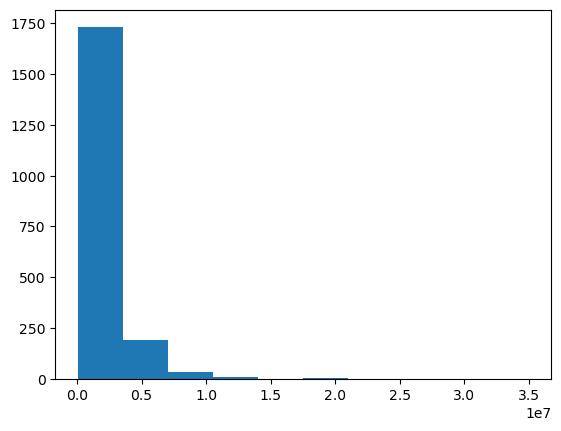

In [10]:
# Visualize the distribution of prices (target variable)
plt.hist(df.Price);

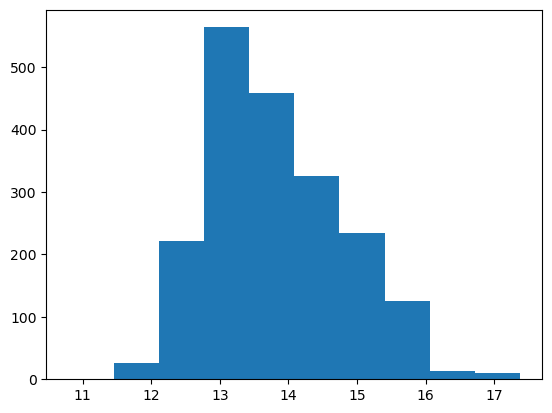

In [11]:
# Create a new target column 'log_Price' containing the logarithm-transformed 'Price' values
df['log_Price']= np.log(df.Price)
plt.hist(df['log_Price']); # Plot a histogram on target 

In [12]:
df.describe() # descriptive statistics for numerical columns

,Price,Year,Kilometer,Engine_cc,Length,Width,Height,Seating Capacity,Max Power (bhp),Max Torque (Nm),log_Price
count,1.979000e+03,1979.000000,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,1.718097e+06,2016.538656,5.407669e+04,1692.575543,4282.235472,1768.052046,1591.424457,5.305710,129.611774,245.851019,13.819522
std,2.448999e+06,3.232466,5.815359e+04,643.736294,442.754297,135.518809,136.516890,0.822474,65.073797,140.465731,0.976010
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,35.000000,48.000000,10.799576
25%,4.900000e+05,2014.000000,2.879150e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,83.000000,115.000000,13.102161
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,116.000000,200.000000,13.623139
75%,1.950000e+06,2019.000000,7.200000e+04,1995.000000,4629.500000,1833.500000,1677.000000,5.000000,171.000000,350.000000,14.483340
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,660.000000,780.000000,17.370859


In [13]:
df.corr()['log_Price'] # Calculate the correlation coefficients between 'log_Price' and other columns

Price               0.797947
Year                0.507711
Kilometer          -0.159618
Engine_cc           0.704325
Length              0.766475
Width               0.774991
Height              0.170543
Seating Capacity    0.094266
Max Power (bhp)     0.823071
Max Torque (Nm)     0.815318
log_Price           1.000000
Name: log_Price, dtype: float64

In [14]:
df.corr()['Price']

Price               1.000000
Year                0.313436
Kilometer          -0.149907
Engine_cc           0.615328
Length              0.556539
Width               0.563727
Height              0.075346
Seating Capacity   -0.040704
Max Power (bhp)     0.781419
Max Torque (Nm)     0.671290
log_Price           0.797947
Name: Price, dtype: float64

In [15]:
df.drop(columns='Price', inplace=True) # Drop the 'Price' column

In [16]:
df.describe(include='object') # Descriptive statistics for features with Categorical data type

,Make,Fuel Type,Transmission,Location,Color,Owner,Seller Type
count,1979,1979,1979,1979,1979,1979,1979
unique,33,7,2,76,17,6,3
top,Maruti Suzuki,Diesel,Manual,Mumbai,White,First,Individual
freq,426,1017,1095,324,763,1572,1920


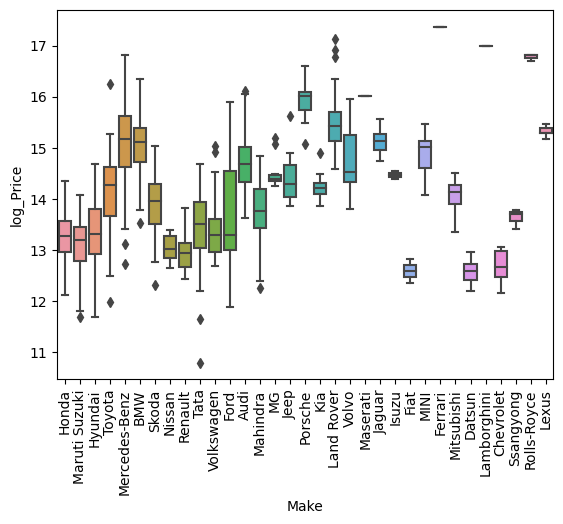

In [17]:
# boxplot to visualize the distribution of log_Price across different brands
sns.boxplot(data=df,x='Make',y='log_Price') 
plt.xticks(rotation=90)
plt.show()

In [18]:
maker_counts = df['Make'].value_counts()  # Count the occurrences of each brand in the 'Make' column
idx = maker_counts[maker_counts<5].index  # Get the indices of brands with counts less than 5
df.drop(df[df['Make'].isin(idx)].index, inplace=True) # Drop rows where the brand is in idx (counts less than 5)

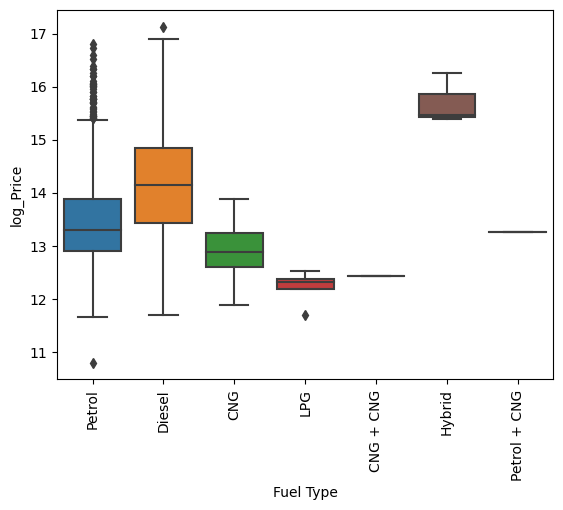

In [19]:
sns.boxplot(data=df,x='Fuel Type',y='log_Price')
plt.xticks(rotation=90)
plt.show()

In [20]:
df.drop(df[df['Fuel Type'].isin(['LPG','CNG + CNG','Petrol + CNG'])].index, inplace=True)

In [21]:
df['Fuel Type'].value_counts()

Diesel    1006
Petrol     896
CNG         50
Hybrid       3
Name: Fuel Type, dtype: int64

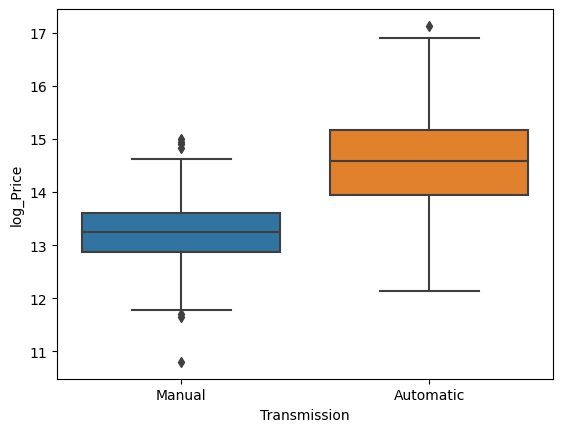

In [22]:
sns.boxplot(data=df,x='Transmission',y='log_Price')
#plt.xticks(rotation=90)
plt.show()

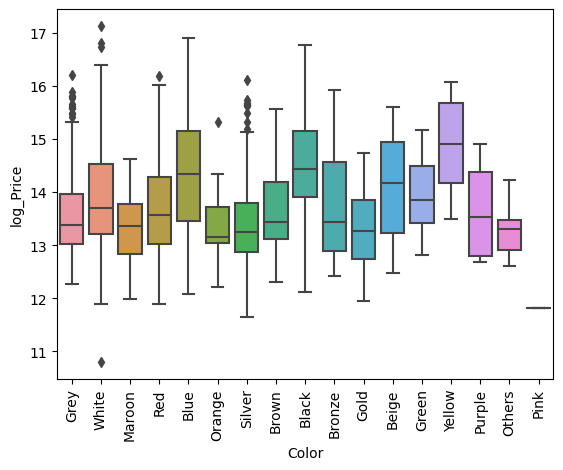

In [23]:
sns.boxplot(data=df,x='Color',y='log_Price')
plt.xticks(rotation=90)
plt.show()

In [24]:
df.drop(df[df['Color']=='Pink'].index, inplace=True)

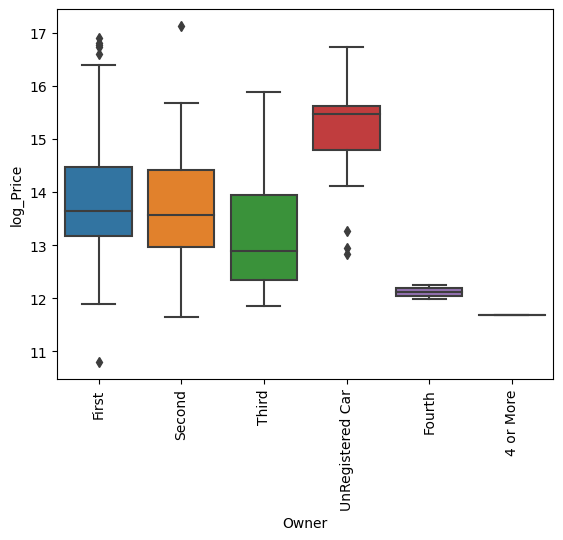

In [25]:
sns.boxplot(data=df,x='Owner',y='log_Price')
plt.xticks(rotation=90)
plt.show()

In [26]:
df.drop(df[df['Owner'].isin(['Fourth','4 or More'])].index, inplace=True)

In [27]:
df.drop(df[df['Seller Type']=='Commercial Registration'].index, inplace=True)


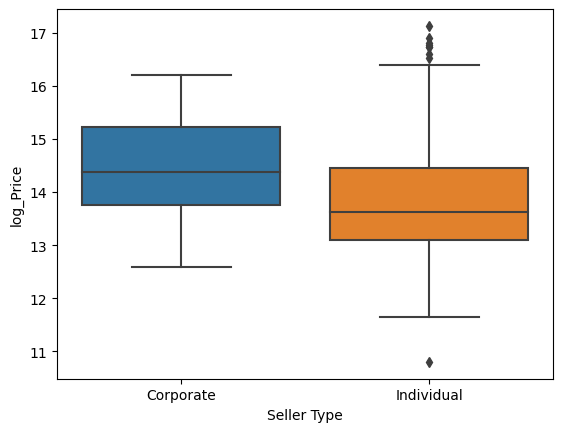

In [28]:
sns.boxplot(data=df,x='Seller Type',y='log_Price')
# plt.xticks(rotation=90)
plt.show()

In [29]:
df.shape

(1946, 17)

In [30]:
df.isnull().any()

Make                False
Year                False
Kilometer           False
Fuel Type           False
Transmission        False
Location            False
Color               False
Owner               False
Seller Type         False
Engine_cc           False
Length              False
Width               False
Height              False
Seating Capacity    False
Max Power (bhp)     False
Max Torque (Nm)     False
log_Price           False
dtype: bool

In [31]:
df.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine_cc,Length,Width,Height,Seating Capacity,Max Power (bhp),Max Torque (Nm),log_Price
0,Honda,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,3990.0,1680.0,1505.0,5.0,87.0,109.0000,13.132314
1,Maruti Suzuki,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,3995.0,1695.0,1555.0,5.0,74.0,190.0000,13.017003
2,Hyundai,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197,3585.0,1595.0,1550.0,5.0,79.0,112.7619,12.301383
3,Toyota,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,3995.0,1745.0,1510.0,5.0,82.0,113.0000,13.591116
4,Toyota,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,4735.0,1830.0,1795.0,7.0,148.0,343.0000,14.483340


In [32]:
X = df.drop(columns= 'log_Price') # Select features (X) by dropping the 'log_Price' target column
y = df['log_Price']   # Select the target variable (y)

In [33]:
categoric = X.select_dtypes('object').columns.tolist() # Getting categorical features
numeric =  X.select_dtypes('number').columns.tolist()  # Getting numerical features

### Model Training and Evaluation:

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [36]:
# Define preprocessing steps for different column types
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categoric),  # One-hot encode categorical features
        ('num', MinMaxScaler(), numeric)   # Scale numeric features to a specified range
    ])

# Define steps for the pipeline
steps = [
    ('preprocessor', preprocessor),  # Step 1: Preprocessing
    ('pca', PCA(n_components=70)),   # Step 2: PCA for dimensionality reduction
    ('model', LinearRegression())]   # Step 3: Machine learning model
pipline = Pipeline(steps)

In [37]:
# Fit the pipeline to the training data
pipline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Make', 'Fuel Type',
                                                   'Transmission', 'Location',
                                                   'Color', 'Owner',
                                                   'Seller Type']),
                                                 ('num', MinMaxScaler(),
                                                  ['Year', 'Kilometer',
                                                   'Engine_cc', 'Length',
                                                   'Width', 'Height',
                                                   'Seating Capacity',
                                                   'Max Power (bhp)',
                                                   'Max Torque (Nm)'])])),
                ('pca', PCA(n_components=70)), ('model', LinearRegression())])

### Evaluate model performance

In [38]:
accuracy = pipline.score(X_test, y_test)
accuracy

0.9036314880647713

In [39]:
y_pred_train = pipline.predict(X_train)
y_pred_test = pipline.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
# Calculate Meab Square Error on Traning Data
mse_train = mean_squared_error(y_train,y_pred_train)
print(f'{mse_train=}')

# Calculate R-squared (R2) score on Traning Data
r2_train = r2_score(y_train,y_pred_train)
print(f'{r2_train=}')

mse_train=0.07279846909213641
r2_train=0.9199353282155036


In [42]:
# Calculate Meab Square Error on Test Data
mse_test = mean_squared_error(y_test,y_pred_test)
print(f'{mse_test=}')

# Calculate R-squared (R2) score on Test Data
r2_test =  r2_score(y_test,y_pred_test)             
print(f'{r2_test=}')

mse_test=0.09333374389238253
r2_test=0.9036314880647713


In [43]:
residuals = y_pred_train - y_pred_train     # Calculate residuals
residuals.sum()                             # Calculate sum of residuals

0.0

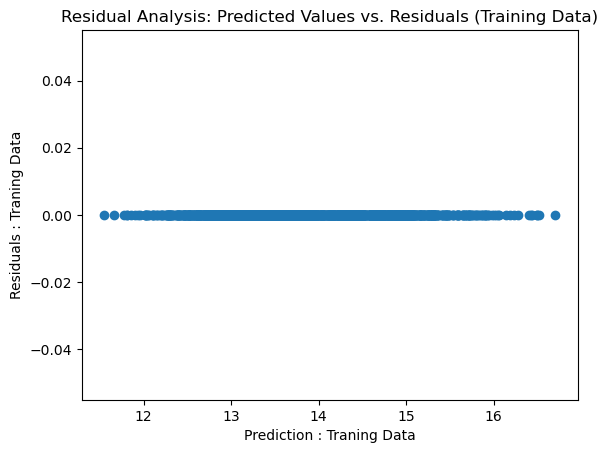

In [44]:
plt.scatter(y_pred_train,residuals)
plt.title('Residual Analysis: Predicted Values vs. Residuals (Training Data)')
plt.xlabel("Prediction : Traning Data")
plt.ylabel("Residuals : Traning Data")
plt.show()